In [9]:
%matplotlib notebook

import common
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd.set_option("display.max_rows", None, "display.max_columns", None)

## Triadic Census
Note that the triadic census for the groups (such as *socialism + Libertarian*) were obtained by generating a network with all nodes/edges in the included subreddits; not simply by combining the triadic censes of the individual subreddits.

In [12]:
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval)
df = pd.read_csv('results/reddit_reply_subset.csv',index_col=0)
df

,003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
Anarchism,25566099088,76196181,49542003,187678,132996,268463,395128,536408,5464,1333,430002,4814,6138,8589,23078,11398
Anarcho_Capitalism,26918538411,151526883,110704179,598708,482659,886011,1555397,1834778,31778,6803,1683315,31103,37240,54264,159328,91123
Anarchy101,177929528,1608735,1437508,4875,5810,8960,20711,19371,183,32,23966,213,233,354,1117,558
Conservative,130287313352,223525242,113735424,586793,332954,703909,869349,1442565,10320,2116,987388,6507,8924,11955,26230,10102
conservatives,70388158,492631,384263,17919,2184,11244,19972,65589,44,10,60065,50,146,129,611,370
Liberal,1952278394,7847156,4736751,16655,12144,20786,26996,42230,339,64,29468,166,337,379,850,335
Libertarian,810924089438,980435790,571689916,1648489,1084950,2046382,2927598,4277488,27981,5321,3266162,23667,32664,42373,117413,56678
politics,286317476272647,65768807965,28293909955,23112050,23221363,34752504,37927067,42959537,427214,68442,25222990,251313,308405,384378,762471,252759
Republican,775785240,3655098,2194233,23395,7945,21434,31304,66263,194,34,47451,151,291,298,907,487
socialism,56601538962,148415024,95156403,355889,260744,501598,748940,950619,10941,2405,713342,9962,11588,17020,43143,20056


## Weighted Average

In [11]:
scaling = df.divide(df.sum(axis=0), axis=1)
scaled = scaling.dot(dims)
scaled

,transitivity,equality,rationality
Anarchism,0.0616766,0.0588209,0.0330981
Anarcho_Capitalism,0.444015,0.279438,0.154612
Anarchy101,0.0028366,0.00219954,0.00123795
Conservative,0.0692342,0.117652,0.0683165
conservatives,0.0016015,0.00318516,0.00145114
Liberal,0.00226087,0.00366532,0.00215177
Libertarian,0.310603,0.374978,0.225048
politics,2.11951,5.13721,5.96392
Republican,0.00250791,0.00401608,0.00213702
socialism,0.114197,0.108589,0.0624852


In [10]:
average = scaling.divide(scaling.sum(axis=1), axis=0).dot(dims)
display(average)

,transitivity,equality,rationality
Anarchism,1.52408,1.45351,0.81788
Anarcho_Capitalism,2.04341,1.28601,0.711545
Anarchy101,1.71655,1.33103,0.749138
Conservative,0.954508,1.62203,0.941856
conservatives,0.92086,1.83145,0.8344
Liberal,0.99249,1.60902,0.944597
Libertarian,1.23915,1.49597,0.897825
politics,0.52463,1.27159,1.47622
Republican,1.04338,1.67084,0.889077
socialism,1.50934,1.43522,0.825871


<IPython.core.display.Javascript object>


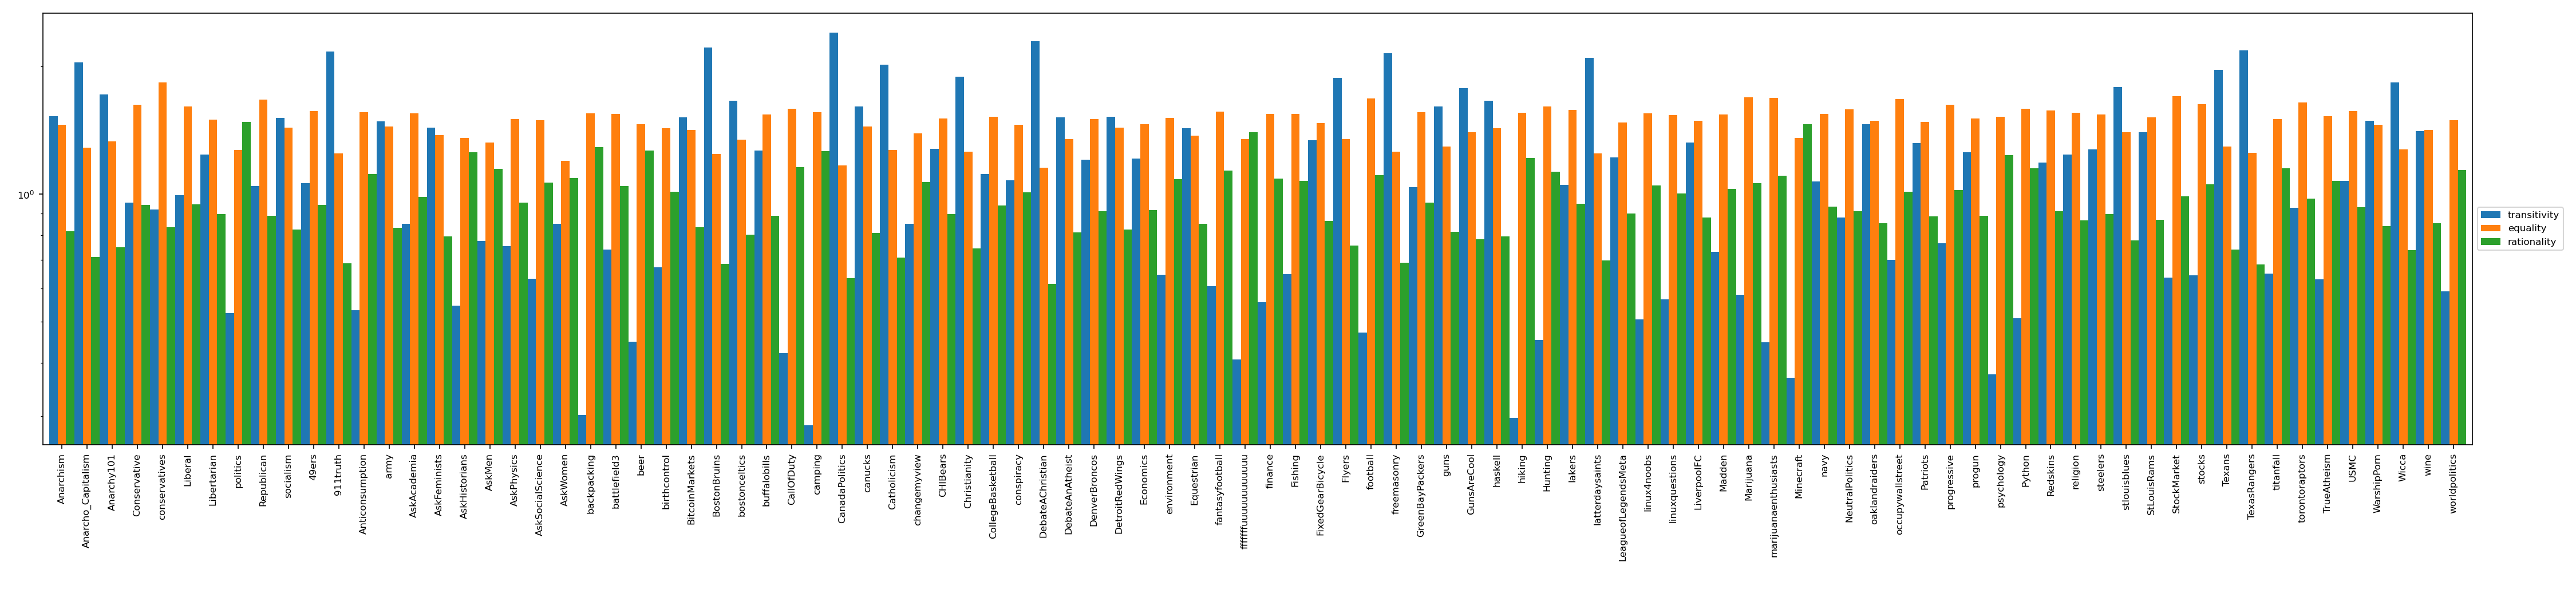

In [13]:
common.plot_df(average, '', (30,7))

<IPython.core.display.Javascript object>


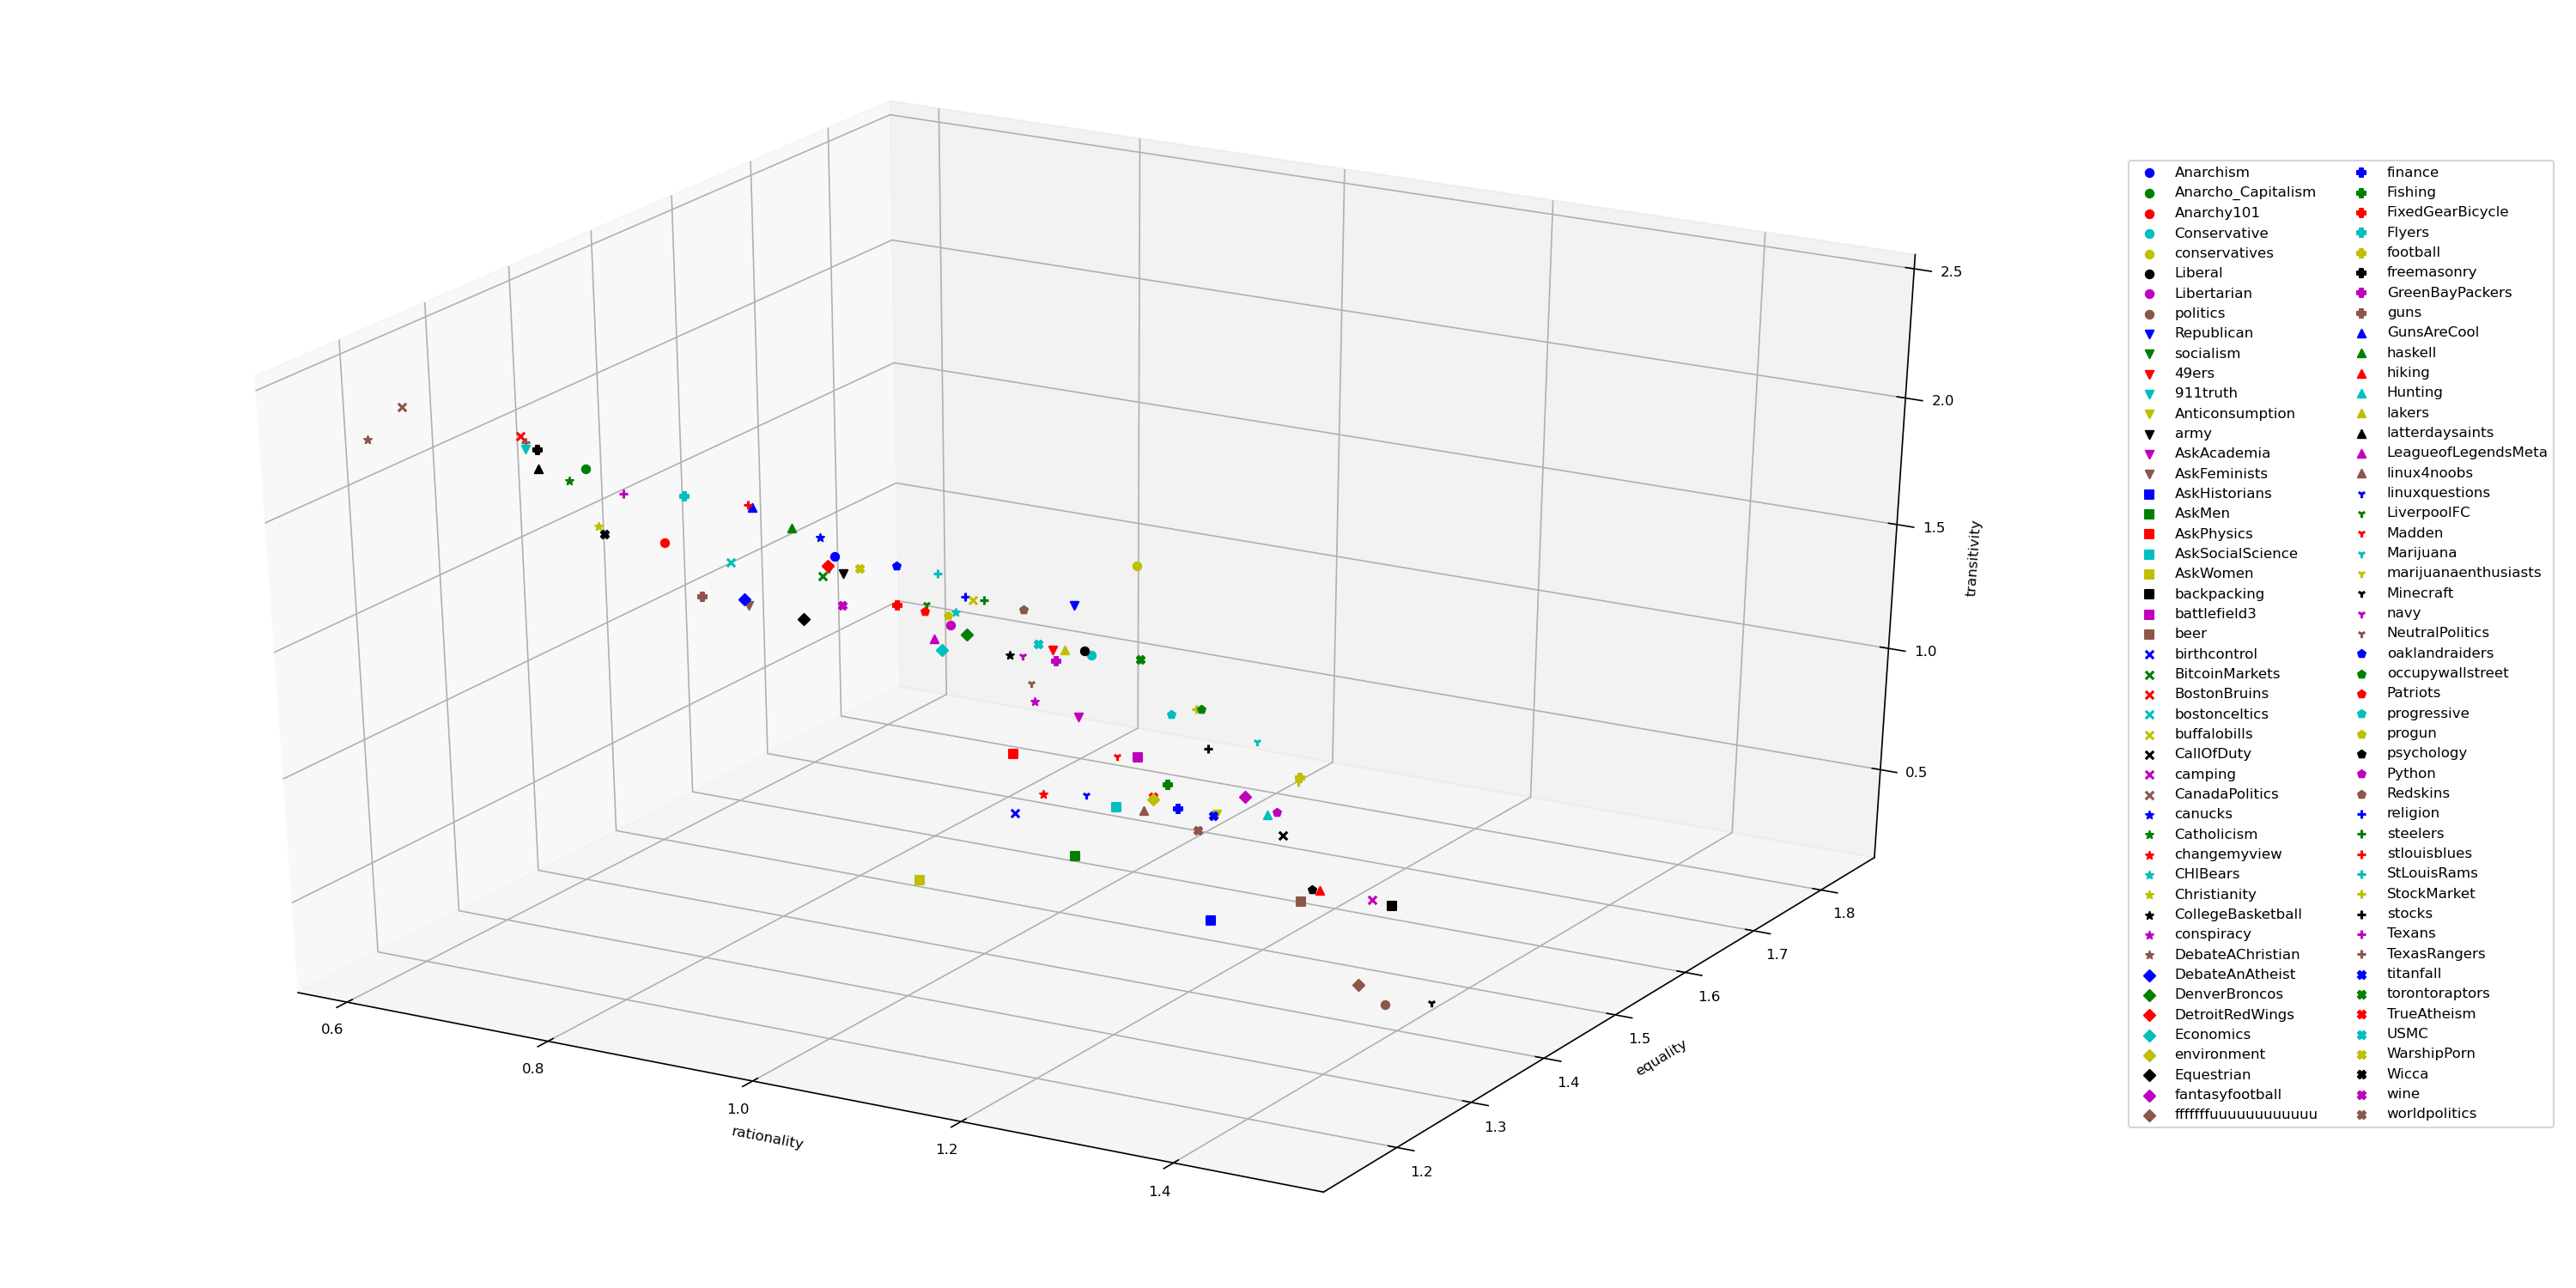

In [6]:
common.plot_3d(average, '', 'rationality', 'equality', 'transitivity', (20,10))

## Notes

* Todo: statistical significane (p-value)
* Dataset: William L. Hamilton*, Justine Zhang*, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky, Jure Leskovec. Loyalty in Online Communities. (Currently under review at WWW 2017). *Equal contribution. http://snap.stanford.edu/data/web-RedditNetworks.html